# Initiate Feature Extraction

In [73]:
import dotenv
import numpy as np
import os
import random
import mne
import enum


class PredCtChannelMapping(enum.Enum):
    Fp1 = 1
    Fp2 = 3
    F3 = 8
    F4 = 12
    C3 = 26
    C4 = 30
    P3 = 46
    P4 = 50
    O1 = 61
    O2 = 63
    F7 = 6
    F8 = 14
    T7 = 24 ## was T3
    T8 = 32 ## was T4
    P7 = 44 ## was T5
    P8 = 52 ## was T6

class ModmaChannelMapping(enum.Enum):
    Fp1 = 22
    Fp2 = 9
    F3 = 24
    F4 = 124
    C3 = 36
    C4 = 104
    P3 = 52
    P4 = 92
    O1 = 70
    O2 = 83
    F7 = 33
    F8 = 122
    T3 = 45
    T4 = 108
    T5 = 58
    T6 = 96

dotenv.load_dotenv()
modmaEpochsDir = os.getenv("MODMA_10S_EPOCHS_DIR")
predctEpochsDir = os.getenv("PREDCT_10S_EPOCHS_DIR")
modmaFeaturesDir = os.getenv("MODMA_10S_FEATURES_DIR")
predctFeaturesDir = os.getenv("PREDCT_10S_FEATURES_DIR")


# === CHANGE THIS TO SWITCH BETWEEN MODMA AND PREDCT DATASET ===
whichEpochsDir = modmaEpochsDir            # !!!!
whichFeaturesDir = modmaFeaturesDir        # !!!!

# --- SET VARIABLES FOR FEATURES EXTRACTION PROCESS -------------
SFREQ = 250                                # !!!!
NUM_CHANNELS = 16
NUM_UNSEEN_HC_SUBJECTS = 4
NUM_UNSEEN_MDD_SUBJECTS = 4
# ===============================================================

mddEpochDir = whichEpochsDir + "/mdd"
hcEpochDir = whichEpochsDir + "/hc"

In [80]:
specifiedMddUnseenFiles = ["2010005_MDD.fif", "2010010_MDD.fif", "2010012_MDD.fif", "2010033_MDD.fif"]  # !!! if MODMA
# specifiedMddUnseenFiles = ["587_MDD.fif", "592_MDD.fif", "602_MDD.fif", "607_MDD.fif", "56_MDD.fif", "558_MDD.fif"]  # !!! if PREDCT

mddFiles = [os.path.join(mddEpochDir, f) for f in os.listdir(mddEpochDir) if f.endswith(".fif")]
hcFiles = [os.path.join(hcEpochDir, f) for f in os.listdir(hcEpochDir) if f.endswith(".fif")]
totalMddSubjects = len(mddFiles)
totalHcSubjects = len(hcFiles)

missingMddFiles = [os.path.join(mddEpochDir, f) for f in specifiedMddUnseenFiles if f not in os.listdir(mddEpochDir)]
if missingMddFiles:
    raise FileNotFoundError(f"The following specified MDD unseen files are missing: {missingMddFiles}")

mddUnseenFiles = [os.path.join(mddEpochDir, f) for f in specifiedMddUnseenFiles if f in os.listdir(mddEpochDir)]
if len(mddUnseenFiles) != NUM_UNSEEN_MDD_SUBJECTS:
    raise ValueError(f"Number of specified MDD unseen files ({len(mddUnseenFiles)}) does not match NUM_UNSEEN_MDD_SUBJECTS ({NUM_UNSEEN_MDD_SUBJECTS}).")
mddEpochFiles = [f for f in mddFiles if f not in mddUnseenFiles]

hcUnseenFiles = random.sample(hcFiles, NUM_UNSEEN_HC_SUBJECTS)
hcEpochFiles = [f for f in hcFiles if f not in hcUnseenFiles]

numMddEpochs = max(0, totalMddSubjects - NUM_UNSEEN_MDD_SUBJECTS)
numHcEpochs = max(0, totalHcSubjects - NUM_UNSEEN_HC_SUBJECTS)
mddEpochFiles = mddEpochFiles[:numMddEpochs]
hcEpochFiles = hcEpochFiles[:numHcEpochs]

mddUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddUnseenFiles])
hcUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcUnseenFiles])
mddEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddEpochFiles])
hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])

Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010005_MDD.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010010_MDD.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010012_MDD.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:26: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010005_MDD.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mddUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddUnseenFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:26: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010010_MDD.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mddUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddUnseenFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:26: RuntimeWarning: This filename (/Users/wachiii/W

        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010023_MDD.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010015_MDD.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/ep

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:28: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010023_MDD.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mddEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:28: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/mdd/2010015_MDD.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mddEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:28: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain

        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2030017_HC.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020018_HC.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch1

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2030017_HC.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020018_HC.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/dat

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020025_HC.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020029_HC.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020013_HC.fif ...
Isotrak not found
    Found the data of interest:
       

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020025_HC.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/dataset/modma/eyeopen_16Channels/epoch10sFiles/hc/2020029_HC.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_48414/3351579144.py:29: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/dat

In [69]:
# mddFiles = [os.path.join(mddEpochDir, f) for f in os.listdir(mddEpochDir) if f.endswith(".fif")]
# hcFiles = [os.path.join(hcEpochDir, f) for f in os.listdir(hcEpochDir) if f.endswith(".fif")]
# totalMddSubjects = len(mddFiles)
# totalHcSubjects = len(hcFiles)
# numMddEpochs = max(0, totalMddSubjects - NUM_UNSEEN_MDD_SUBJECTS)
# numHcEpochs = max(0, totalHcSubjects - NUM_UNSEEN_HC_SUBJECTS)

# mddUnseenFiles = random.sample(mddFiles, NUM_UNSEEN_MDD_SUBJECTS)
# hcUnseenFiles = random.sample(hcFiles, NUM_UNSEEN_HC_SUBJECTS)

# mddEpochFiles = [f for f in mddFiles if f not in mddUnseenFiles][:numMddEpochs]
# hcEpochFiles = [f for f in hcFiles if f not in hcUnseenFiles][:numHcEpochs]

# mddUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddUnseenFiles])
# hcUnseenEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcUnseenFiles])
# mddEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in mddEpochFiles])
# hcEpochs = mne.concatenate_epochs([mne.read_epochs(f) for f in hcEpochFiles])

In [70]:
print(f"Total MDD subjects: {totalMddSubjects}")
print(f"Total HC subjects: {totalHcSubjects}")
print(f"Number of unseen MDD subjects: {len(mddUnseenFiles)}")
print(f"Number of unseen HC subjects: {len(hcUnseenFiles)}")
print(f"Number of MDD epochs: {len(mddEpochFiles)}")
print(f"Number of HC epochs: {len(hcEpochFiles)}")

print(f"mddUnseenEpochs shape: {mddUnseenEpochs.get_data().shape}")
print(f"hcUnseenEpochs shape: {hcUnseenEpochs.get_data().shape}")
print(f"mddEpochs shape: {mddEpochs.get_data().shape}")
print(f"hcEpochs shape: {hcEpochs.get_data().shape}")

Total MDD subjects: 24
Total HC subjects: 29
Number of unseen MDD subjects: 0
Number of unseen HC subjects: 5
Number of MDD epochs: 25
Number of HC epochs: 36
mddUnseenEpochs shape: (79, 16, 2500)
hcUnseenEpochs shape: (90, 16, 2500)
mddEpochs shape: (450, 16, 2500)
hcEpochs shape: (641, 16, 2500)


## Feature Extraction

### 1. Band Power

In [49]:
from brainmdd.features.psd import EEGPowerSpectrum

# NOTE: featureDict looks like this:
featureDict = {
    "band_power": {
        "mdd": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            },
        "control": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            }
        }
    }

resultFileEpochMap = [
    ("bandpower_MDD.npy", mddEpochs.get_data()),
    ("bandpower_HC.npy", hcEpochs.get_data()),
    ("bandpower_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("bandpower_HC_unseen.npy", hcUnseenEpochs.get_data())
]

bandPowerFeatureDir = whichFeaturesDir + "/bandpower"
if not os.path.exists(bandPowerFeatureDir):
    os.makedirs(bandPowerFeatureDir)    

In [50]:
def calculate_and_save_bandpower_features(result_file_epoch_map, bandpower_feature_dir, sfreq):
    for filename, epochs in result_file_epoch_map:        
        psdObj = EEGPowerSpectrum(epochs, sfreq, ifNormalize=False)
        bandpowerFeatures = psdObj.run()
        save_path = os.path.join(bandpower_feature_dir, filename)
        np.save(save_path, bandpowerFeatures)
        print(f"Saved {filename} to {save_path}")
    print("Feature extraction and saving completed.")

In [51]:
calculate_and_save_bandpower_features(resultFileEpochMap, bandPowerFeatureDir, SFREQ)

Saved bandpower_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/bandpower/bandpower_MDD.npy
Saved bandpower_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/bandpower/bandpower_HC.npy
Saved bandpower_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/bandpower/bandpower_MDD_unseen.npy
Saved bandpower_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/bandpower/bandpower_HC_unseen.npy
Feature extraction and saving completed.


### 2. Relative Power

In [46]:
from brainmdd.features.psd import EEGPowerSpectrum


# NOTE: featureDict looks like this:
featureDict = {
    "relative_power": {
        "mdd": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            },
        "control": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            }
        }
    }

resultFileEpochMap = [
    ("relativepower_MDD.npy", mddEpochs.get_data()),
    ("relativepower_HC.npy", hcEpochs.get_data()),
    ("relativepower_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("relativepower_HC_unseen.npy", hcUnseenEpochs.get_data())
]

relativePowerFeatureDir = whichFeaturesDir + "/relativepower"
if not os.path.exists(relativePowerFeatureDir):
    os.makedirs(relativePowerFeatureDir)

In [47]:
def calculate_and_save_relative_power_features(result_file_epoch_map, relative_power_feature_dir, sfreq):
    for filename, epochs in result_file_epoch_map:
        psdObj = EEGPowerSpectrum(epochs, sfreq, ifNormalize=True)  
        relativePowerFeatures = psdObj.run()
        save_path = os.path.join(relative_power_feature_dir, filename)
        np.save(save_path, relativePowerFeatures)
        print(f"Saved {filename} to {save_path}")
    print("Relative power feature extraction and saving completed.")

In [48]:
calculate_and_save_relative_power_features(resultFileEpochMap, relativePowerFeatureDir, SFREQ)

Saved relativepower_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/relativepower/relativepower_MDD.npy
Saved relativepower_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/relativepower/relativepower_HC.npy
Saved relativepower_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/relativepower/relativepower_MDD_unseen.npy
Saved relativepower_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/relativepower/relativepower_HC_unseen.npy
Relative power feature extraction and saving completed.


### 3. Higuchi Fractral Dimension (HFD)

In [52]:
from brainmdd.features.hfd import EEGHiguchiFractalDimension

# NOTE: featureDict looks like this:
featureDict = {
    "HFD": {
        "mdd": [],
        "control": []
    }
}

resultFileEpochMap = [
    ("hfd_MDD.npy", mddEpochs.get_data()),
    ("hfd_HC.npy", hcEpochs.get_data()),
    ("hfd_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("hfd_HC_unseen.npy", hcUnseenEpochs.get_data())
]

hfdFeatureDir = whichFeaturesDir + "/hfd"
if not os.path.exists(hfdFeatureDir):
    os.makedirs(hfdFeatureDir)

In [53]:
def calculate_and_save_hfd_features(result_file_epoch_map, hfd_feature_dir):
    for filename, epochs in result_file_epoch_map: 
        hfdObj = EEGHiguchiFractalDimension(epochs)
        hfdFeatures = hfdObj.run()
        save_path = os.path.join(hfd_feature_dir, filename)
        np.save(save_path, hfdFeatures)
        print(f"Saved {filename} to {save_path}")
    print("HFD feature extraction and saving completed.")

In [54]:
calculate_and_save_hfd_features(resultFileEpochMap, hfdFeatureDir)

Saved hfd_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/hfd/hfd_MDD.npy
Saved hfd_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/hfd/hfd_HC.npy
Saved hfd_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/hfd/hfd_MDD_unseen.npy
Saved hfd_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/hfd/hfd_HC_unseen.npy
HFD feature extraction and saving completed.


### 4. Coherences

In [55]:
from brainmdd.features.coherence import EEGCoherence

# NOTE: featureDict looks like this:
featureDict = {
    "coherence": {
        "mdd": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            },
        "control": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            }
        }
    } 

resultFileEpochMap = [
    ("coherence_MDD.npy", mddEpochs.get_data()),
    ("coherence_HC.npy", hcEpochs.get_data()),
    ("coherence_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("coherence_HC_unseen.npy", hcUnseenEpochs.get_data())
]

coherenceFeatureDir = whichFeaturesDir + "/coherence"
if not os.path.exists(coherenceFeatureDir):
    os.makedirs(coherenceFeatureDir)

In [56]:
def calculate_and_save_coherence_features(result_file_epoch_map, coherence_feature_dir, sfreq):
    for filename, epoch_data in result_file_epoch_map:
        coherenceObj = EEGCoherence(epoch_data, sfreq)
        coherenceFeatures = coherenceObj.run()
        save_path = os.path.join(coherence_feature_dir, filename)
        np.save(save_path, coherenceFeatures)
        print(f"Saved {filename} to {save_path}")
    print("Coherence feature extraction and saving completed.")

In [57]:
calculate_and_save_coherence_features(resultFileEpochMap, coherenceFeatureDir, SFREQ)

Saved coherence_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/coherence/coherence_MDD.npy
Saved coherence_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/coherence/coherence_HC.npy
Saved coherence_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/coherence/coherence_MDD_unseen.npy
Saved coherence_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/coherence/coherence_HC_unseen.npy
Coherence feature extraction and saving completed.


### 5. Correlation Dimension (CD)

In [ ]:
from brainmdd.features.correlationdimension import EEGCorrelationDimension

# NOTE: featureDict looks like this:
featureDict = {
    "CD": {
        "mdd": [],
        "control": []
    }
}

resultFileEpochMap = [
    ("cd_MDD.npy", mddEpochs.get_data()),
    ("cd_HC.npy", hcEpochs.get_data()),
    ("cd_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("cd_HC_unseen.npy", hcUnseenEpochs.get_data())
]

cdFeatureDir = whichFeaturesDir + "/cd"
if not os.path.exists(cdFeatureDir):
    os.makedirs(cdFeatureDir)

In [12]:
def calculate_and_save_cd_features(result_file_epoch_map, cd_feature_dir, sfreq):
    for filename, epoch_data in result_file_epoch_map:
        cdObj = EEGCorrelationDimension(epoch_data, sfreq)
        cdFeatures = cdObj.run()
        save_path = os.path.join(cd_feature_dir, filename)
        np.save(save_path, cdFeatures)
        print(f"Saved {filename} to {save_path}")
    print("Coherence Density feature extraction and saving completed.")

In [13]:
calculate_and_save_cd_features(resultFileEpochMap, cdFeatureDir, SFREQ)

Saved cd_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/modma/cd/cd_MDD.npy
Saved cd_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/modma/cd/cd_HC.npy
Saved cd_unseen_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/modma/cd/cd_unseen_MDD.npy
Saved cd_unseen_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/modma/cd/cd_unseen_HC.npy
Coherence Density feature extraction and saving completed.


### 6. Sub-band Abs power

In [58]:
from brainmdd.features.psd_subband import EEGSubPowerSpectrum

# NOTE: featureDict looks like this:
featureDict = {
    "sub_band_power": {
        "mdd": {
            "alpha1": [],
            "alpha2": [],
            "beta1": [],
            "beta2": [],
            "beta3": []
            },
        "control": {
            "alpha1": [],
            "alpha2": [],
            "beta1": [],
            "beta2": [],
            "beta3": []
            }
        }
    }

resultFileEpochMap = [
    ("subbandpower_MDD.npy", mddEpochs.get_data()),
    ("subbandpower_HC.npy", hcEpochs.get_data()),
    ("subbandpower_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("subbandpower_HC_unseen.npy", hcUnseenEpochs.get_data())
]

subBandPowerFeatureDir = whichFeaturesDir + "/subbandpower"
if not os.path.exists(subBandPowerFeatureDir):
    os.makedirs(subBandPowerFeatureDir)

In [59]:
def calculate_and_save_subband_power_features(result_file_epoch_map, subband_power_feature_dir, sfreq):
    for filename, epochs in result_file_epoch_map:
        psdObj = EEGSubPowerSpectrum(epochs, sfreq, ifNormalize=True)  
        subbandPowerFeatures = psdObj.run()
        save_path = os.path.join(subband_power_feature_dir, filename)
        np.save(save_path, subbandPowerFeatures)
        print(f"Saved {filename} to {save_path}")
    print("Sub-band power feature extraction and saving completed.")

In [60]:
calculate_and_save_subband_power_features(resultFileEpochMap, subBandPowerFeatureDir, SFREQ)

Saved subbandpower_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/subbandpower/subbandpower_MDD.npy
Saved subbandpower_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/subbandpower/subbandpower_HC.npy
Saved subbandpower_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/subbandpower/subbandpower_MDD_unseen.npy
Saved subbandpower_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/subbandpower/subbandpower_HC_unseen.npy
Sub-band power feature extraction and saving completed.


### 7. Alpha-Beta ratio

In [61]:
from brainmdd.features.psd import EEGPowerSpectrum

resultFileEpochMap = [
    ("alphabeta_MDD.npy", mddEpochs.get_data()),
    ("alphabeta_HC.npy", hcEpochs.get_data()),
    ("alphabeta_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("alphabeta_HC_unseen.npy", hcUnseenEpochs.get_data())
]

bandPowerFeatureDir = whichFeaturesDir + "/alphabeta"
if not os.path.exists(bandPowerFeatureDir):
    os.makedirs(bandPowerFeatureDir)    

In [62]:
def calculate_and_save_alphabeta_ratio_features(result_file_epoch_map, alphabeta_feature_dir, sfreq):
    for filename, epochs in result_file_epoch_map:        
        psdObj = EEGPowerSpectrum(epochs, sfreq, ifNormalize=False)
        bandpowerFeatures = psdObj.run()
        alphabetaFeatures = (bandpowerFeatures[:, 2, :] / bandpowerFeatures[:, 3, :]).reshape(-1, 1, 16)
        save_path = os.path.join(alphabeta_feature_dir, filename)
        np.save(save_path, alphabetaFeatures)
        print(f"shape of {filename}: {alphabetaFeatures.shape}")
        print(f"Saved {filename} to {save_path}")
        

In [63]:
calculate_and_save_alphabeta_ratio_features(resultFileEpochMap, bandPowerFeatureDir, SFREQ)

shape of alphabeta_MDD.npy: (450, 1, 16)
Saved alphabeta_MDD.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/alphabeta/alphabeta_MDD.npy
shape of alphabeta_HC.npy: (641, 1, 16)
Saved alphabeta_HC.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/alphabeta/alphabeta_HC.npy
shape of alphabeta_MDD_unseen.npy: (79, 1, 16)
Saved alphabeta_MDD_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/alphabeta/alphabeta_MDD_unseen.npy
shape of alphabeta_HC_unseen.npy: (90, 1, 16)
Saved alphabeta_HC_unseen.npy to /Users/wachiii/Workschii/brain-mdd/data/features/10s_epochbased/predct/alphabeta/alphabeta_HC_unseen.npy


### Alpha-Theta ratio

In [64]:
from brainmdd.features.psd import EEGPowerSpectrum

resultFileEpochMap = [
    ("alphatheta_MDD.npy", mddEpochs.get_data()),
    ("alphatheta_HC.npy", hcEpochs.get_data()),
    ("alphatheta_MDD_unseen.npy", mddUnseenEpochs.get_data()),
    ("alphatheta_HC_unseen.npy", hcUnseenEpochs.get_data())
]

bandPowerFeatureDir = whichFeaturesDir + "/alphatheta"
if not os.path.exists(bandPowerFeatureDir):
    os.makedirs(bandPowerFeatureDir)    

In [65]:
def calculate_and_save_alphatheta_ratio_features(result_file_epoch_map, alphatheta_feature_dir, sfreq):
    for filename, epochs in result_file_epoch_map:        
        psdObj = EEGPowerSpectrum(epochs, sfreq, ifNormalize=False)
        bandpowerFeatures = psdObj.run()
        alphabetaFeatures = (bandpowerFeatures[:, 2, :] / bandpowerFeatures[:, 0, :]).reshape(-1, 1, 16)
        save_path = os.path.join(alphatheta_feature_dir, filename)
        np.save(save_path, alphabetaFeatures)
        print(f"shape of {filename}: {alphabetaFeatures.shape}")

In [66]:
calculate_and_save_alphatheta_ratio_features(resultFileEpochMap, bandPowerFeatureDir, SFREQ)

shape of alphatheta_MDD.npy: (450, 1, 16)
shape of alphatheta_HC.npy: (641, 1, 16)
shape of alphatheta_MDD_unseen.npy: (79, 1, 16)
shape of alphatheta_HC_unseen.npy: (90, 1, 16)


## Inspect Feature

In [44]:
from sklearn.datasets import make_blobs
import dotenv
import os
import random
import mne
import enum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


class PredCtChannelMapping(enum.Enum):
    Fp1 = 1
    Fp2 = 3
    F3 = 8
    F4 = 12
    C3 = 26
    C4 = 30
    P3 = 46
    P4 = 50
    O1 = 61
    O2 = 63
    F7 = 6
    F8 = 14
    T7 = 24 ## was T3
    T8 = 32 ## was T4
    P7 = 44 ## was T5
    P8 = 52 ## was T6

class ModmaChannelMapping(enum.Enum):
    Fp1 = 22
    Fp2 = 9
    F3 = 24
    F4 = 124
    C3 = 36
    C4 = 104
    P3 = 52
    P4 = 92
    O1 = 70
    O2 = 83
    F7 = 33
    F8 = 122
    T3 = 45
    T4 = 108
    T5 = 58
    T6 = 96
    
    
modmaFeaturesDir = os.getenv("MODMA_30S_FEATURES_DIR")
predctFeaturesDir = os.getenv("PREDCT_30S_FEATURES_DIR")

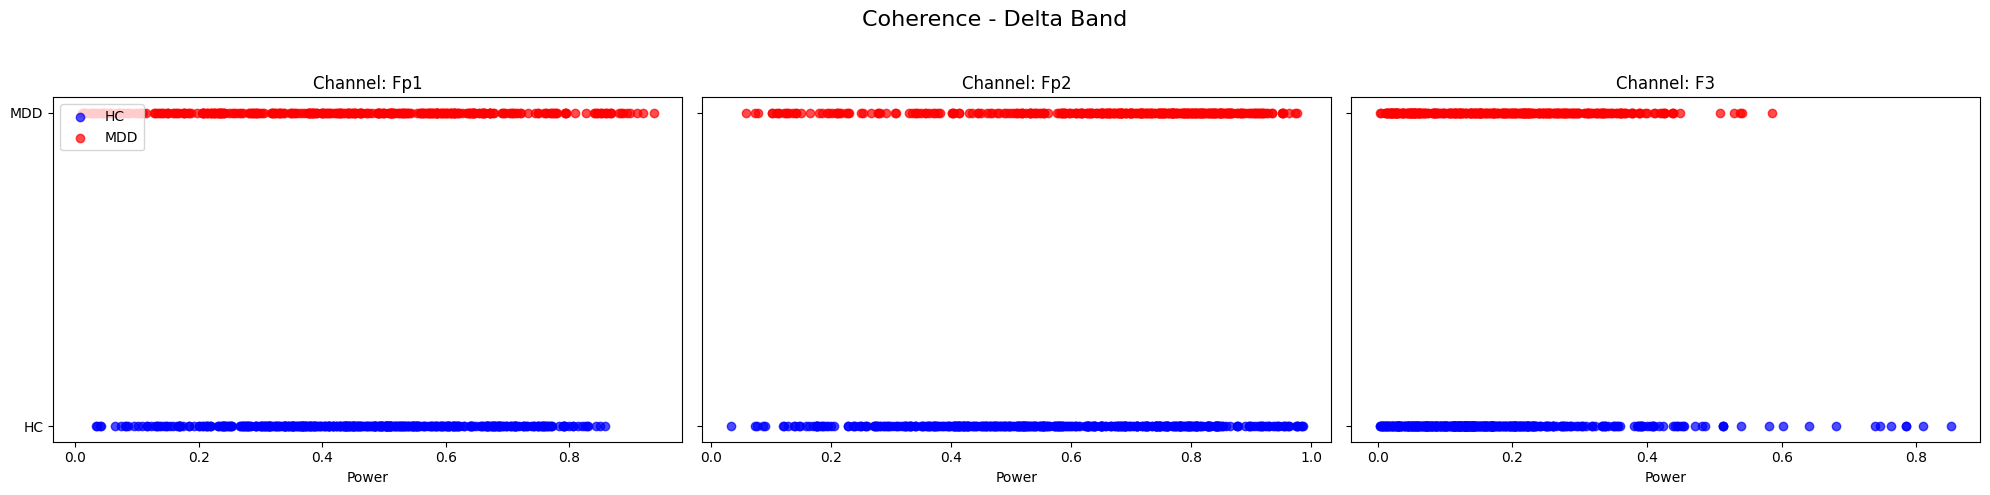

In [61]:
whichFeatureToPlot = "coherence" # !!!!
whichDatasetToPlot = modmaFeaturesDir # !!!!
whichChannel = 3

hcDataToplotPath = modmaFeaturesDir + "/" + whichFeatureToPlot + "/" + f"{whichFeatureToPlot}_HC.npy"
mddDataToplotPath = modmaFeaturesDir + "/" + whichFeatureToPlot + "/" + f"{whichFeatureToPlot}_MDD.npy"

# Load the data
hcFeatures = np.load(hcDataToplotPath)
mddFeatures = np.load(mddDataToplotPath)

# Frequency bands
freqBands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

# Channels to plot (indices correspond to Fp1 = 0, Fp2 = 1, etc.)
channelsToPlot = {
    "Fp1": 0,
    "Fp2": 1,
    "F3": 2
}

# Frequency band to pick (e.g., Delta = index 0, Theta = index 1, etc.)
freqBandIndex = 0  # Change this to select a different frequency band (0 = Delta, 1 = Theta, etc.)

# Create subplots
fig, axes = plt.subplots(1, len(channelsToPlot), figsize=(20, 5), sharey=True)
fig.suptitle(f"{whichFeatureToPlot.capitalize()} - {freqBands[freqBandIndex]} Band", fontsize=16)

# Loop through channels and plot
for i, (channelName, channelIndex) in enumerate(channelsToPlot.items()):
    # Extract data for the specific frequency band and channel
    hcData = hcFeatures[:, freqBandIndex, channelIndex]
    mddData = mddFeatures[:, freqBandIndex, channelIndex]

    # Plot HC and MDD data
    ax = axes[i]
    ax.scatter(hcData, np.zeros_like(hcData), label="HC", alpha=0.7, color="blue")
    ax.scatter(mddData, np.ones_like(mddData), label="MDD", alpha=0.7, color="red")
    ax.set_title(f"Channel: {channelName}", fontsize=12)
    ax.set_xlabel("Power")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["HC", "MDD"])

# Add legend to the first subplot
axes[0].legend(loc="upper left")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()